In [38]:
import pandas as pd
from pathlib import Path

In [39]:
df = pd.read_csv(Path("train.csv"), index_col=0, header=0)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [40]:
cars = df.drop("price", axis=1)
cars_label = df["price"].copy()

In [41]:
cars.describe()

,model_year,milage
count,188533.000000,188533.000000
mean,2015.829998,65705.295174
std,5.660967,49798.158076
min,1974.000000,100.000000
25%,2013.000000,24115.000000
50%,2017.000000,57785.000000
75%,2020.000000,95400.000000
max,2024.000000,405000.000000


In [42]:
cars.info() #Has some missing values, additionally, there is a lot of categorical data which can be onehot encoded or numericised

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
dtypes: int64(2), object(9)
memory usage: 17.3+ MB


# EDA

### Brands

In [43]:
cars_copy = cars.copy()

<Axes: xlabel='brand'>

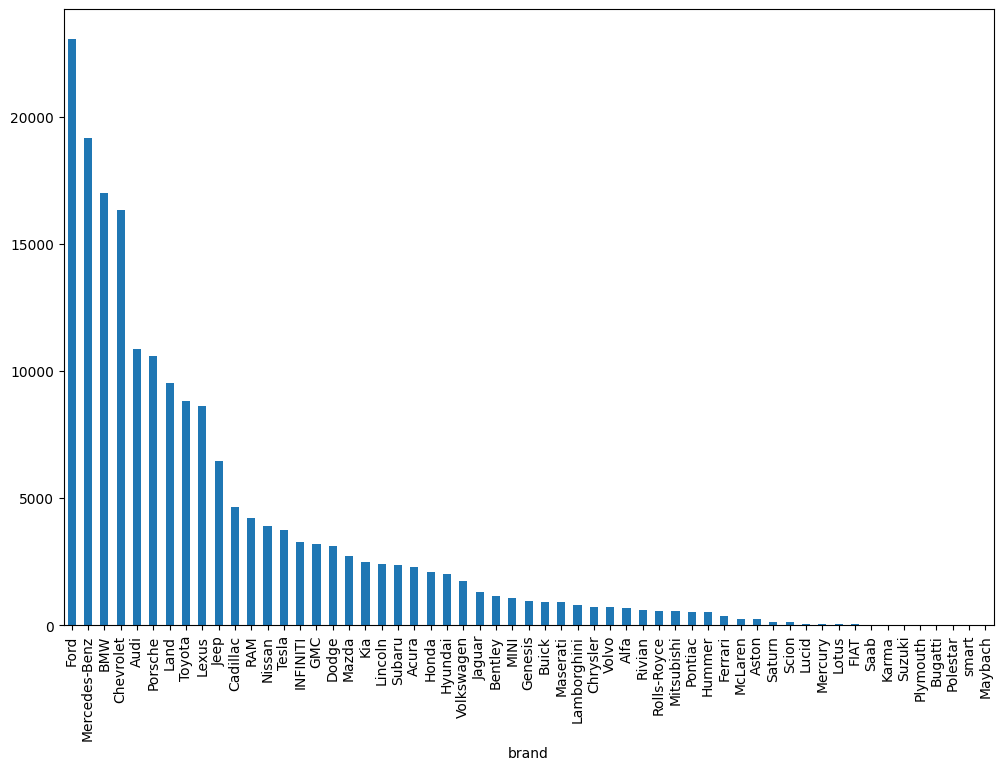

In [44]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
cars_copy["brand"].value_counts().plot(kind='bar')

### Amount of models per brand

Text(0.5, 0, 'brand')

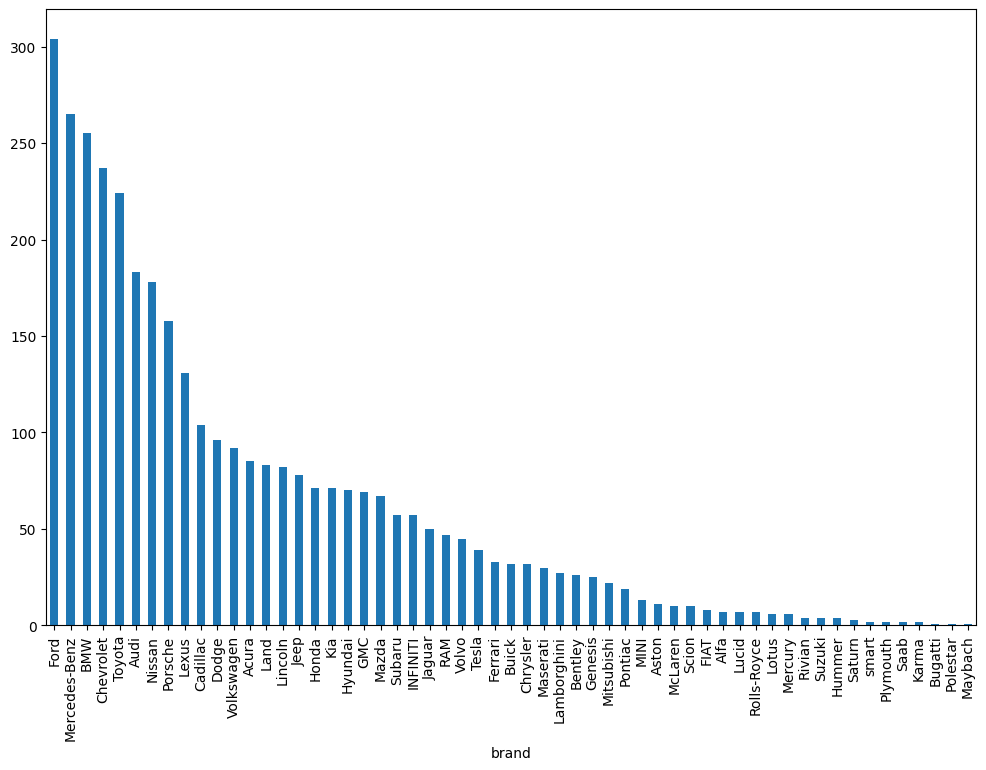

In [45]:
model_counts = []

for brand in set(cars_copy["brand"]):
    filt = cars_copy[cars_copy["brand"] == brand]
    unique = len(set(filt["model"]))
    model_counts.append((brand, unique))

models = pd.DataFrame(model_counts)
models = models.set_index(0)
models = models.set_axis(["unique models"], axis="columns")
models["unique models"].sort_values(ascending=False).plot(kind="bar")
plt.xlabel("brand")

### Year

<Axes: xlabel='model_year'>

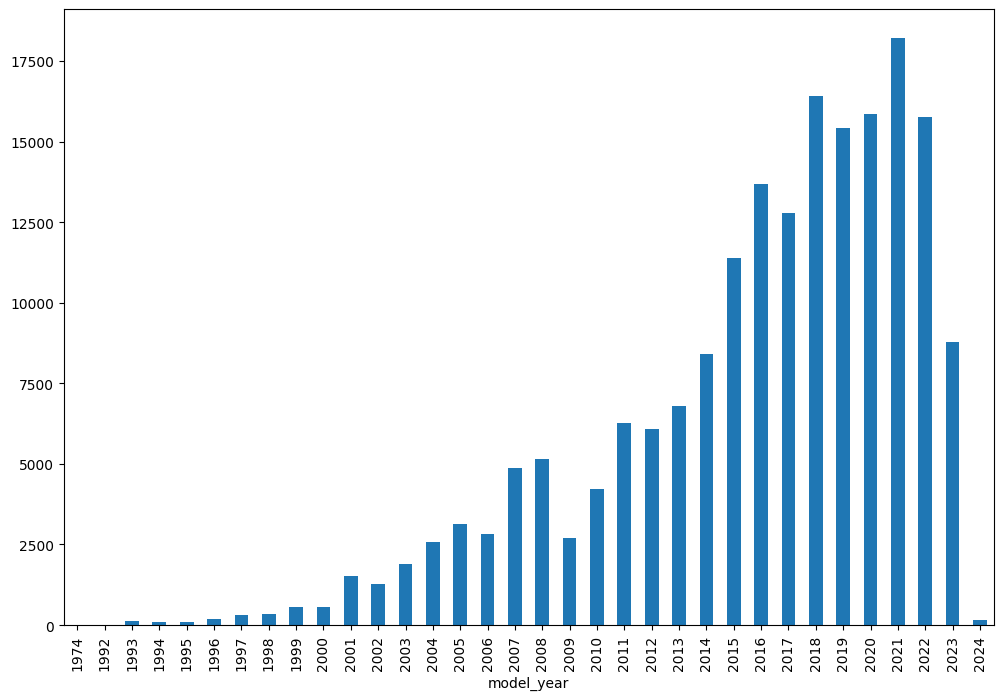

In [46]:
cars_copy["model_year"].value_counts().sort_index().plot(kind="bar")

### Average mileage per brand, the higher the mileage the cheaper it is usually, more used

Text(0, 0.5, 'Average Milage')

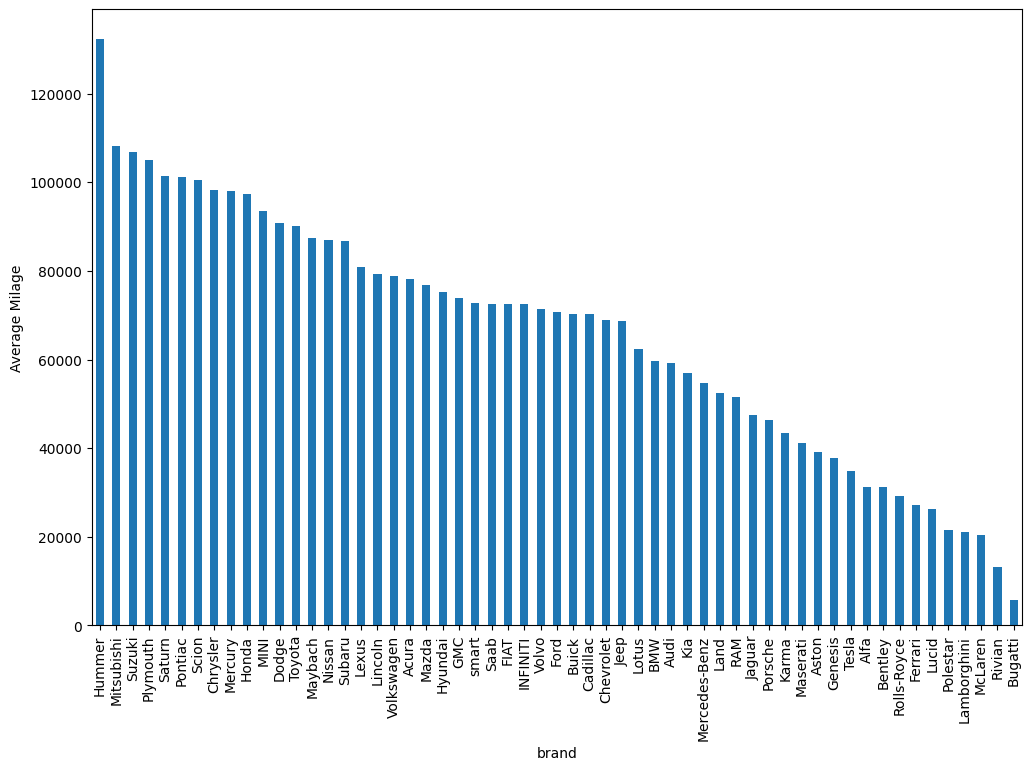

In [47]:
milage_brand = []

for brand in set(cars_copy["brand"]):
    filt = cars_copy[cars_copy["brand"] == brand]
    milage_brand.append((brand, filt["milage"].mean()))

milage = pd.DataFrame(milage_brand)
milage = milage.set_index(0)
milage = milage.set_axis(["brands"], axis="columns")
milage["brands"].sort_values(ascending=False).plot(kind="bar")
plt.xlabel("brand")
plt.ylabel("Average Milage")

- Does it tell us much about the data? In reality, some cars are used for certain purposes, a Hummer will have on average a higher milage than a ferari becuase people that use it are adventurous. Additionally, what is the ratio of people who own hummers to people who have bugatti? Probably much higher. I dont believe that the Milage will be a significant factor in the price. It may have some correlation but not the biggest correlation

### Fuel Type

<Axes: ylabel='count'>

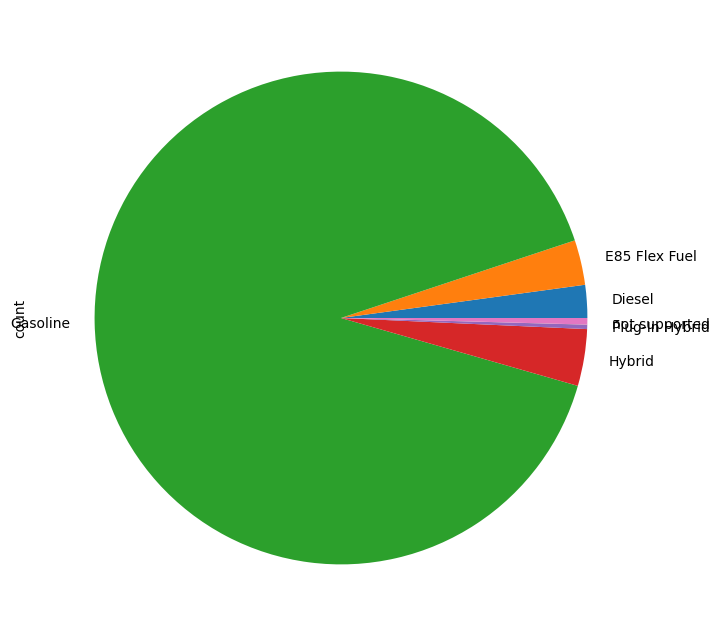

In [48]:
cars_copy["fuel_type"].value_counts().sort_index().plot(kind="pie")

### Engine Type

In [49]:
len(cars_copy["engine"])

188533

In [50]:
len(set(cars_copy["engine"]))

1117

In [52]:
looking = [i.split() for i in cars_copy["engine"] if len(i.split()) == 1]

<Axes: xlabel='0'>

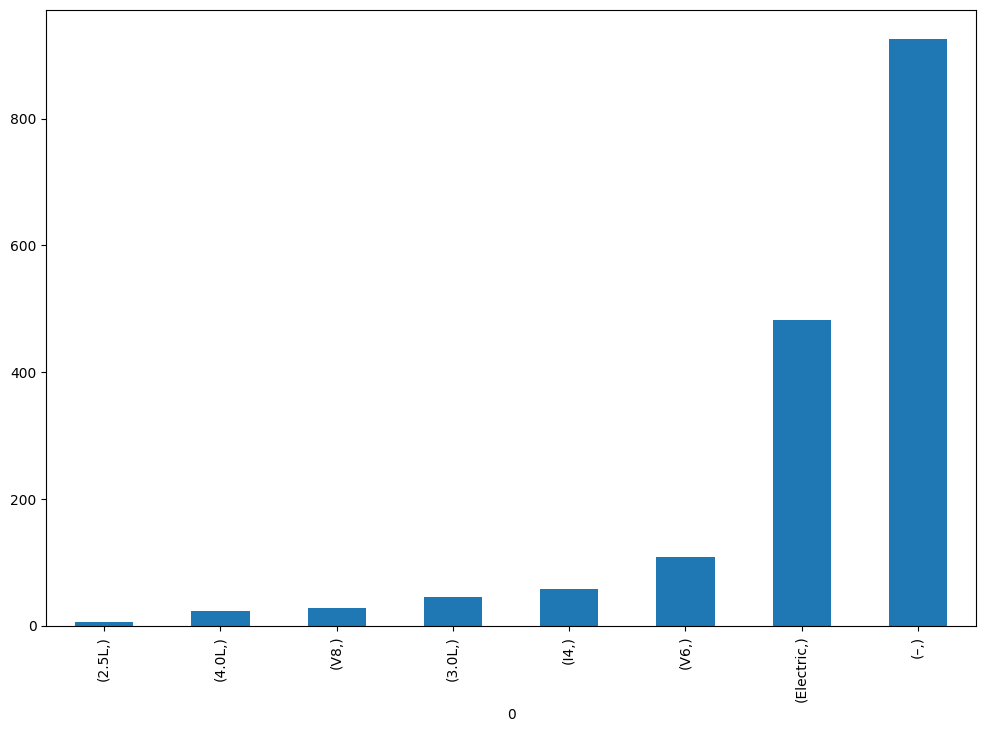

In [55]:
pd.DataFrame(looking).value_counts().sort_values().plot(kind="bar")

- This can be broken down and split into different lists, where it is split at the spaces, and then the first 3 are taken for horsepower, liters, and type of engine